import sys
!{sys.executable} -m pip install yfinance

!{sys.executable} -m pip install matplotlib

!{sys.executable} -m pip install scikit-learn

!{sys.executable} -m pip install xgboost

In [2]:
import yfinance as yf
import os
import pandas as pd


In [6]:
eth_ticker = yf.Ticker("ETH-USD")

In [7]:
eth = eth_ticker.history(period="max")

In [8]:
eth

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-09 00:00:00+00:00,2973.971680,3057.958252,2951.223877,3036.020508,10861947179,0.0,0.0
2024-05-10 00:00:00+00:00,3036.231201,3052.729492,2881.000732,2909.791260,12278653601,0.0,0.0
2024-05-11 00:00:00+00:00,2909.845459,2942.178711,2888.083252,2911.602051,6795916454,0.0,0.0


In [10]:
eth.index = pd.to_datetime(eth.index)

In [11]:
eth.columns = [c.lower() for c in btc.columns]

In [12]:
del eth["dividends"]
del eth["stock splits"]

<Axes: xlabel='Date'>

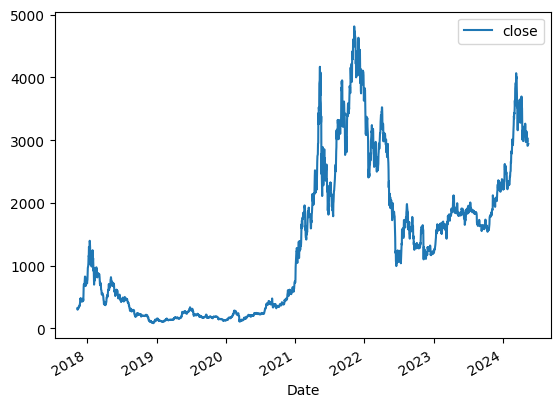

In [15]:
eth.plot.line(y="close", use_index=True)

In [16]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [17]:
wiki

,edit_count,sentiment,neg_sentiment
2014-05-05,2.133333,0.119197,0.092778
2014-05-06,1.966667,0.092831,0.092778
2014-05-07,1.966667,0.092831,0.092778
2014-05-08,1.966667,0.092831,0.092778
2014-05-09,1.166667,0.071284,0.090000
...,...,...,...
2024-05-10,0.066667,-0.066594,0.066667
2024-05-11,0.066667,-0.066594,0.066667
2024-05-12,0.066667,-0.066594,0.066667
2024-05-13,0.033333,-0.033270,0.033333


In [19]:
eth = eth.tz_localize(None)

In [20]:
eth = eth.merge(wiki, left_index=True, right_index=True)

In [21]:
eth

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,0.900000,-0.144123,0.261111
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,0.966667,-0.177429,0.294444
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,0.966667,-0.177429,0.294444
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,0.966667,-0.177429,0.294444
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,1.100000,-0.209260,0.327778
...,...,...,...,...,...,...,...,...
2024-05-09,2973.971680,3057.958252,2951.223877,3036.020508,10861947179,0.066667,-0.066594,0.066667
2024-05-10,3036.231201,3052.729492,2881.000732,2909.791260,12278653601,0.066667,-0.066594,0.066667
2024-05-11,2909.845459,2942.178711,2888.083252,2911.602051,6795916454,0.066667,-0.066594,0.066667
2024-05-12,2911.658203,2953.047363,2902.201904,2928.701904,5908941395,0.066667,-0.066594,0.066667


In [22]:
eth["tommorow"] = eth["close"].shift(-1)

In [23]:
eth

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tommorow
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,0.900000,-0.144123,0.261111,299.252991
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,0.966667,-0.177429,0.294444,314.681000
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,0.966667,-0.177429,0.294444,307.907990
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,0.966667,-0.177429,0.294444,316.716003
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,1.100000,-0.209260,0.327778,337.631012
...,...,...,...,...,...,...,...,...,...
2024-05-09,2973.971680,3057.958252,2951.223877,3036.020508,10861947179,0.066667,-0.066594,0.066667,2909.791260
2024-05-10,3036.231201,3052.729492,2881.000732,2909.791260,12278653601,0.066667,-0.066594,0.066667,2911.602051
2024-05-11,2909.845459,2942.178711,2888.083252,2911.602051,6795916454,0.066667,-0.066594,0.066667,2928.701904
2024-05-12,2911.658203,2953.047363,2902.201904,2928.701904,5908941395,0.066667,-0.066594,0.066667,2938.868164


In [24]:
eth["target"] = (eth["tommorow"] > eth["close"]).astype(int)

In [25]:
eth

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tommorow,target
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,0.900000,-0.144123,0.261111,299.252991,0
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,0.966667,-0.177429,0.294444,314.681000,1
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,0.966667,-0.177429,0.294444,307.907990,0
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,0.966667,-0.177429,0.294444,316.716003,1
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,1.100000,-0.209260,0.327778,337.631012,1
...,...,...,...,...,...,...,...,...,...,...
2024-05-09,2973.971680,3057.958252,2951.223877,3036.020508,10861947179,0.066667,-0.066594,0.066667,2909.791260,0
2024-05-10,3036.231201,3052.729492,2881.000732,2909.791260,12278653601,0.066667,-0.066594,0.066667,2911.602051,1
2024-05-11,2909.845459,2942.178711,2888.083252,2911.602051,6795916454,0.066667,-0.066594,0.066667,2928.701904,1
2024-05-12,2911.658203,2953.047363,2902.201904,2928.701904,5908941395,0.066667,-0.066594,0.066667,2938.868164,1


In [27]:
eth["target"].value_counts()

target
1    1218
0    1160
Name: count, dtype: int64

In [46]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2378 entries, 2017-11-09 to 2024-05-14
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   open           2378 non-null   float64
 1   high           2378 non-null   float64
 2   low            2378 non-null   float64
 3   close          2378 non-null   float64
 4   volume         2378 non-null   int64  
 5   edit_count     2378 non-null   float64
 6   sentiment      2378 non-null   float64
 7   neg_sentiment  2378 non-null   float64
 8   tommorow       2377 non-null   float64
 9   target         2378 non-null   int32  
dtypes: float64(8), int32(1), int64(1)
memory usage: 195.1 KB


##NOTE TO SELF: IF THE DATASET WAS MIORE IMBALANCED IN TERMS OF INCREASE/DECREASE BD 
##THEN OTHER CONSIDERATIONS WOULD NEED OT BE IMPLEMENTED IN TRAINING

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

In [60]:
train = eth.iloc[:-200]
test = eth[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]

model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [61]:
from sklearn.metrics import precision_score

In [62]:
# test.index = pd.to_datetime(test.index)
# test.columns = [c.lower() for c in test.columns]

In [64]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.5918367346938775

In [65]:
test

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tommorow,target
2023-10-27,1803.794922,1804.135864,1751.440063,1780.045288,7493399771,0.166667,0.087959,0.000000,1776.618164,0
2023-10-28,1780.084229,1800.605347,1773.436646,1776.618164,4226112731,0.166667,0.087959,0.000000,1795.546021,1
2023-10-29,1776.563965,1810.488647,1766.052979,1795.546021,4358528382,0.166667,0.087959,0.000000,1810.088623,1
2023-10-30,1795.589111,1829.249512,1779.364502,1810.088623,7534051038,0.166667,0.087959,0.000000,1816.458984,1
2023-10-31,1810.131592,1819.972656,1784.567627,1816.458984,6477922747,0.166667,0.087959,0.000000,1847.089722,1
...,...,...,...,...,...,...,...,...,...,...
2024-05-09,2973.971680,3057.958252,2951.223877,3036.020508,10861947179,0.066667,-0.066594,0.066667,2909.791260,0
2024-05-10,3036.231201,3052.729492,2881.000732,2909.791260,12278653601,0.066667,-0.066594,0.066667,2911.602051,1
2024-05-11,2909.845459,2942.178711,2888.083252,2911.602051,6795916454,0.066667,-0.066594,0.066667,2928.701904,1
2024-05-12,2911.658203,2953.047363,2902.201904,2928.701904,5908941395,0.066667,-0.066594,0.066667,2938.868164,1


In [69]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    precision_score(test["target"], preds)
    combined = pd.concat([test["target"], preds], axis=1)
    return combined
    

In [71]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [101]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(eth, model, predictors)

In [102]:
precision_score(predictions["target"], predictions["predictions"])

0.5447941888619855

In [96]:
def compute_rolling(eth):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = eth.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        eth[ratio_column] = eth["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        eth[edit_column] = rolling_averages["edit_count"]

        rolling = eth.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        eth[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return eth, new_predictors

In [97]:
eth, new_predictors = compute_rolling(eth.copy())


In [98]:
predictions = backtest(eth, model, new_predictors)


In [99]:
precision_score(predictions["target"], predictions["predictions"])

0.5084745762711864